In [10]:
import warnings 
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd

# Loading the dataset to examine its structure
file_path = 'dataset/data.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()

,Year,"Population, total","Labor force, total","Employers, total (% of total employment) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)",GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Gross savings (% of GNI),"GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)","Inflation, GDP deflator (annual %)",Exports of goods and services (current US$),Imports of goods and services (current US$),"Current account balance (BoP, current US$)",Current account balance (% of GDP),Consumer price index (2010 = 100),"Inflation, consumer prices (annual %)"
0,1998,21810542,8797880,2.94,3.20,7.216750e+10,-7.36,3308.84,42.13,3690,10830,8.50,8.352935e+10,6.765593e+10,9528651059,13.20,77.183832,5.270342
1,1999,22368655,9079434,2.29,3.43,7.914842e+10,6.14,3538.36,41.16,3430,11180,0.05,9.601605e+10,7.618789e+10,12603657895,15.92,79.302189,2.744561
2,2000,22945150,9352131,2.98,3.00,9.378974e+10,8.86,4087.56,39.09,3490,11980,8.86,1.120000e+11,9.434974e+10,8487894737,9.05,80.519272,1.534740
3,2001,23542517,9627564,3.28,3.53,9.278395e+10,0.52,3941.12,34.78,3570,12110,-1.58,1.020000e+11,8.625395e+10,7286842368,7.85,81.660057,1.416785
4,2002,24142445,9908787,3.02,3.48,1.010000e+11,5.39,4177.10,35.03,3800,12740,3.13,1.090000e+11,9.182079e+10,7189736842,7.13,83.136366,1.807872


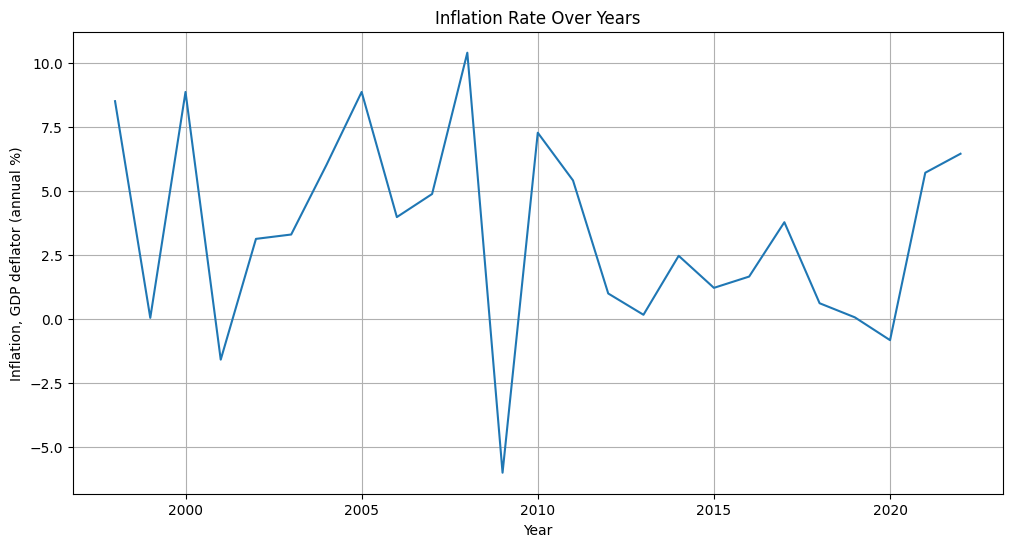

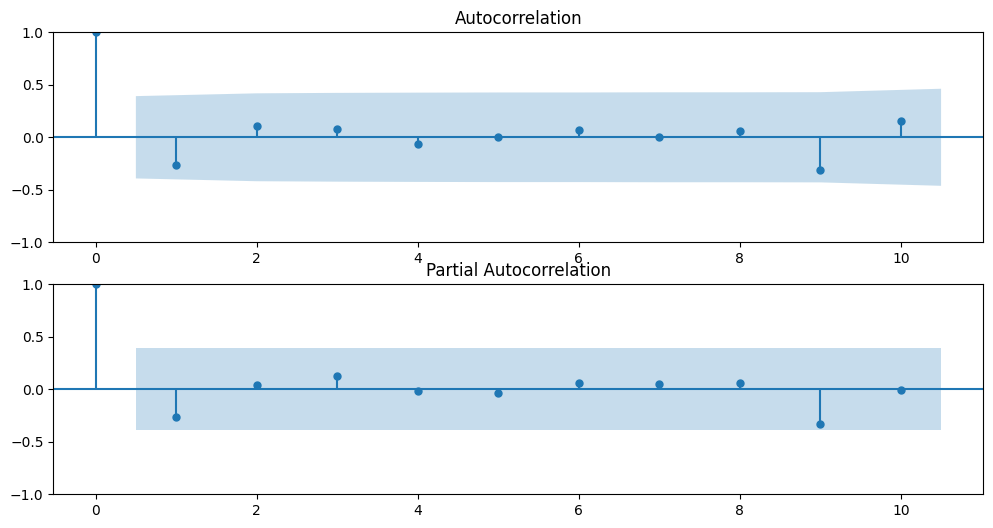

In [12]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Selecting the 'Year' and 'Inflation, GDP deflator (annual %)' columns
inflation_data = data[['Year', 'Inflation, GDP deflator (annual %)']].set_index('Year')

# Plotting the inflation data
plt.figure(figsize=(12, 6))
plt.plot(inflation_data)
plt.title('Inflation Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Inflation, GDP deflator (annual %)')
plt.grid(True)
plt.show()

# Plotting ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
sm.graphics.tsa.plot_acf(inflation_data.values.squeeze(), lags=10, ax=plt.gca())
plt.subplot(212)
sm.graphics.tsa.plot_pacf(inflation_data.values.squeeze(), lags=10, ax=plt.gca())
plt.show()


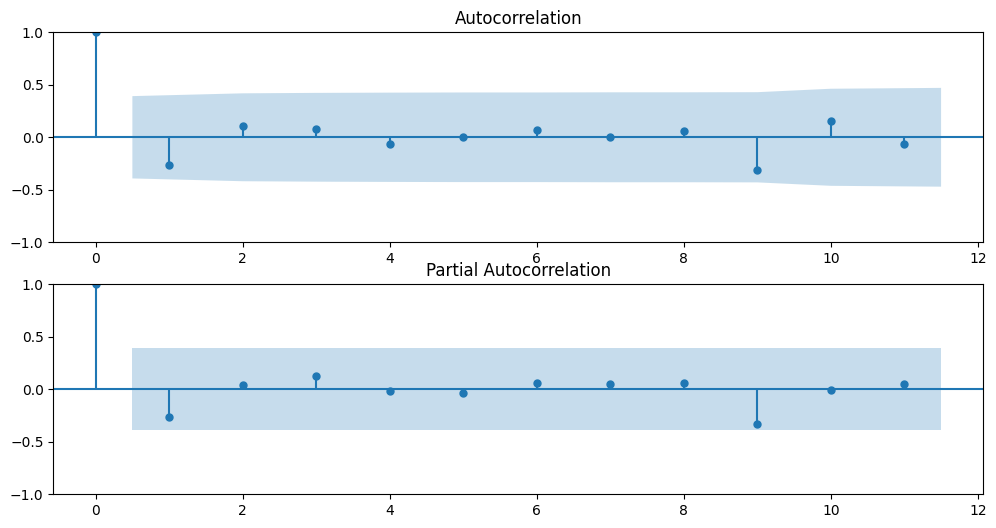

In [13]:
# Adjusting the number of lags for ACF and PACF plots
max_lags = len(inflation_data) // 2 - 1

plt.figure(figsize=(12, 6))
plt.subplot(211)
sm.graphics.tsa.plot_acf(inflation_data.values.squeeze(), lags=max_lags, ax=plt.gca())
plt.subplot(212)
sm.graphics.tsa.plot_pacf(inflation_data.values.squeeze(), lags=max_lags, ax=plt.gca())
plt.show()


In [14]:
import itertools

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq_combinations = list(itertools.product(p, d, q))

# Search for the best ARIMA model parameters based on AIC
best_aic = float("inf")
best_pdq = None
best_model_summary = None

for combination in pdq_combinations:
    try:
        # Trying a new combination of parameters
        model = SARIMAX(inflation_data, order=combination, seasonal_order=(0, 0, 0, 0), enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)
        
        # Compare this model's AIC to the best so far
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = combination
            best_model_summary = model_fit.summary()
    except:
        continue

best_aic, best_pdq, best_model_summary



(121.06321722245525,
 (0, 2, 2),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                        SARIMAX Results                                        
 Dep. Variable:     Inflation, GDP deflator (annual %)   No. Observations:                   25
 Model:                               SARIMAX(0, 2, 2)   Log Likelihood                 -57.532
 Date:                                Fri, 29 Dec 2023   AIC                            121.063
 Time:                                        12:31:41   BIC                            124.050
 Sample:                                             0   HQIC                           121.646
                                                  - 25                                         
 Covariance Type:                                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 --------------------------------------------------------------------

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# ARIMA Model Configuration
# These parameters are usually chosen based on the ACF and PACF plots
# For demonstration, let's start with some common settings and adjust if necessary
p = 0 # Autoregressive order
d = 2 # Differencing order
q = 2  # Moving average order

# Building the ARIMA model
model = SARIMAX(inflation_data, order=(p, d, q), seasonal_order=(0, 0, 0, 0), enforce_stationarity=False, enforce_invertibility=False)

# Fitting the model
model_fit = model.fit(disp=False)

# Summarize model
model_summary = model_fit.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     Inflation, GDP deflator (annual %)   No. Observations:                   25
Model:                               SARIMAX(0, 2, 2)   Log Likelihood                 -57.532
Date:                                Fri, 29 Dec 2023   AIC                            121.063
Time:                                        12:32:05   BIC                            124.050
Sample:                                             0   HQIC                           121.646
                                                 - 25                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.8038   1.93e+04  -9.36e-05      1.000   -3.78e+04    3.78e+04
ma.L2          1.0000   2.14e+04   4.68e-05      1.000   -4.19e+04    4.19e+04
sigma2        15.1392   3.23e+05   4.68e-05      1.000   -6.34e+05    6.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                36.02
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -2.10
Prob(H) (two-sided):                  0.11   Kurtosis:                         8.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

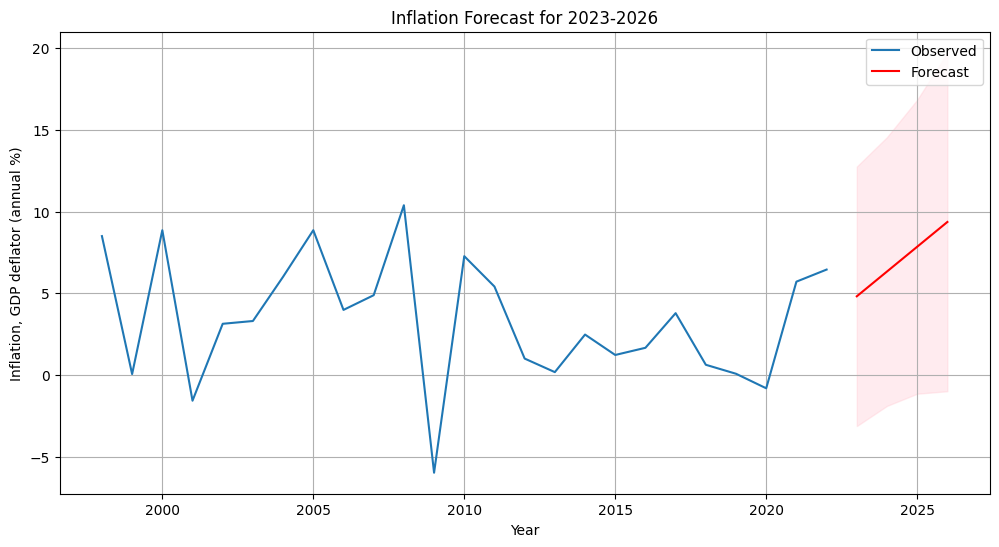

25    4.813000
26    6.330230
27    7.847460
28    9.364691
Name: predicted_mean, dtype: float64

In [16]:
# Forecasting for the years 2023, 2024, 2025, and 2026
forecast_years = 4
last_year = inflation_data.index[-1]
forecast = model_fit.get_forecast(steps=forecast_years)

# Obtaining the forecast and confidence intervals
forecast_index = range(last_year + 1, last_year + 1 + forecast_years)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Preparing data for plotting
lower_limits = confidence_intervals.iloc[:, 0]
upper_limits = confidence_intervals.iloc[:, 1]

# Plotting the forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(inflation_data, label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, lower_limits, upper_limits, color='pink', alpha=0.3)
plt.title('Inflation Forecast for 2023-2026')
plt.xlabel('Year')
plt.ylabel('Inflation, GDP deflator (annual %)')
plt.legend()
plt.grid(True)
plt.show()

# Displaying the forecast values
forecast_values

In [17]:
# Forecasting inflation rates for the years 2023, 2024, 2025, and 2026
forecast_years = 4
forecast = model_fit.get_forecast(steps=forecast_years)
forecast_conf_int = forecast.conf_int()

# Extracting the forecast and confidence intervals
forecast_values = forecast.predicted_mean
lower_conf_int = forecast_conf_int.iloc[:, 0]
upper_conf_int = forecast_conf_int.iloc[:, 1]

# Creating a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Year': pd.date_range(start='2023', periods=forecast_years, freq='Y').year,
    'Forecast': forecast_values,
    'Lower CI': lower_conf_int,
    'Upper CI': upper_conf_int
})

forecast_df.set_index('Year', inplace=True)
forecast_df



,Forecast,Lower CI,Upper CI
Year,,,
2023,4.813000,-3.131989,12.757990
2024,6.330230,-1.898192,14.558652
2025,7.847460,-1.151265,16.846186
2026,9.364691,-0.999315,19.728696
